In [55]:
import glob
from des_helpers import encrypt, dec2bin, bin2hex, dpa_select_function
import numpy as np
import pandas as pd

# Path to the directory with CSV files
dataset_dir = "../HardwareData"
files = glob.glob(f"{dataset_dir}/*.npy")

print(f"Loaded DES data from {files[0]}")
data_des = np.load(files[0])
print(f"Loaded AES data from {files[1]}")
data_aes = np.load(files[1])

Loaded DES data from ../HardwareData/ENC_DES_1024_trials_2024-12-19-18-04-32.npy
Loaded AES data from ../HardwareData/ENC_AES_1024_trials_2024-12-19-18-10-56.npy


In [56]:
plaintexts = range(0, 1024)

powers_at_t = {}

# Find the minimum value in the entire dataset
# min_value = np.min(data_des)

# Shift all values to be positive by adding the absolute value of the minimum to every element
shifted_data = np.abs(data_des)

for t in range(100):
    powers = []
    for pt in plaintexts:
        trace = shifted_data[pt]
        power = trace[t]
        powers.append(power)
    
    powers_at_t[t]=powers

powers_at_t = pd.DataFrame(powers_at_t)

0: 4.806640625
1: 2.96484375
2: 7.412109375
3: 4.908203125
4: 2.90234375
5: 1.8828125
6: 10.55078125
7: 4.009765625
8: 5.888671875
9: 2.537109375
10: -1.0
11: 2.142578125
12: 2.728515625
13: 4.828125
14: 8.529296875
15: 6.0546875
16: 5.154296875
17: 7.990234375
18: 6.62109375
19: 2.337890625
20: -1.001953125
21: 5.236328125
22: 5.9453125
23: 5.90234375
24: 7.15234375
25: 9.34375
26: 5.8203125
27: 6.3359375
28: 0.306640625
29: 7.46484375
30: 1.0
31: 6.818359375
32: 7.322265625
33: 6.986328125
34: 6.9140625
35: 4.6875
36: 4.697265625
37: 8.599609375
38: 2.76171875
39: 10.46875
40: 6.3203125
41: 1.025390625
42: 6.701171875
43: 3.74609375
44: 6.138671875
45: 9.828125
46: 6.498046875
47: 7.328125
48: 5.466796875
49: 2.771484375
50: 3.93359375
51: 8.5
52: 2.525390625
53: 11.423828125
54: 0.267578125
55: 6.212890625
56: 4.919921875
57: 15.28515625
58: 5.07421875
59: 5.49609375
60: 5.92578125
61: 5.54296875
62: 5.3125
63: 5.806640625
64: 0.90625
65: 5.890625
66: 3.625
67: 12.013671875
68: 7.33

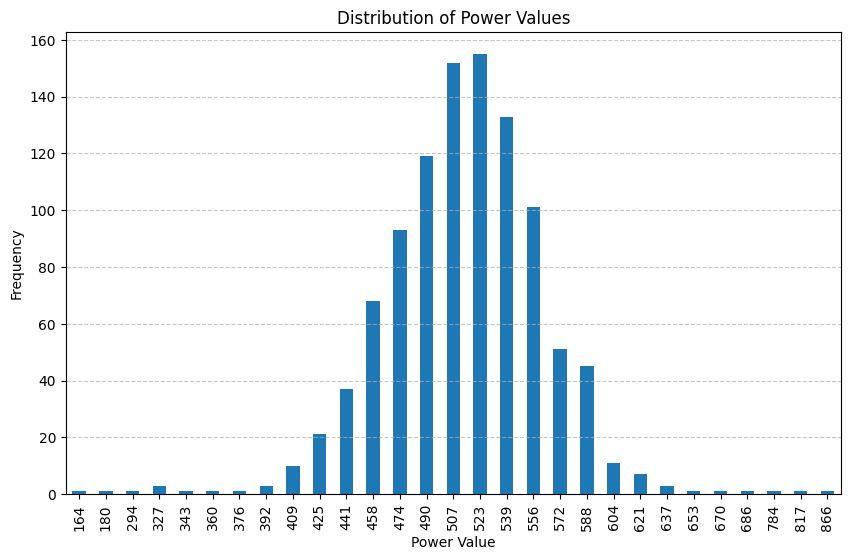

In [57]:
import matplotlib.pyplot as plt

key = 0
plaintexts = range(0, 1024)

dom_at_t = []

for t in range(100):
    sel_values = np.array([dpa_select_function(f"{pt:016x}".upper(), key) for pt in plaintexts])

    # Partition the power traces based on selection values
    group0_indices = [i for i, val in enumerate(sel_values) if val == 0]
    group1_indices = [i for i, val in enumerate(sel_values) if val == 1]
    
    # Extract power traces for each group
    group0_powers = [powers_at_t[t][i] for i in group0_indices]
    group1_powers = [powers_at_t[t][i] for i in group1_indices]
    
    # Compute average power consumption for each group at the time point of interest
    avg_group0 = np.mean(group0_powers) if len(group0_powers) > 0 else 0
    avg_group1 = np.mean(group1_powers) if len(group1_powers) > 0 else 0
    
    # Compute the difference of means (DOM)
    dom = avg_group1 - avg_group0
    print(f"{t}: {dom}")
    dom_at_t.append(dom)

t = np.argmax(dom_at_t)
print(t)

# Sort the values by index (optional, for better visualization)
counts = powers_at_t[t].value_counts()

counts = counts.sort_index()

# Plot the value counts
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title("Distribution of Power Values")
plt.xlabel("Power Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
trace_data = []
key = f"{0:016x}".upper()
plaintexts = range(0, 1024)

# Append to the list
for pt in plaintexts:
	trace = data_des[pt]
	
	power_value = trace[t]

	plaintext = f"{pt:016x}".upper()
	ciphertext = bin2hex(encrypt(plaintext, key))

	trace_data.append({
		"Key": key,
		"Plaintext": plaintext,
		"Ciphertext": ciphertext,
		"Power": power_value
	})

# Convert to DataFrame for easier handling
trace_df = pd.DataFrame(trace_data)
trace_df.to_csv("des_extension_data.csv", index=False)